<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-osduarte2/blob/main/Oscar_Duarte_GEOL_593_Module_5_Advanced_Plane_and_Spatial_Sliding_in_Rock_Mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Advanced Plane and Spatial Sliding in Rock Mass

## Introduction
The following notebook builds on the concepts from the eight referenced textbook pages.  
These sections expand on the physics of **plane sliding in rock mass**, examining situations where the sliding surface is constrained by joint sets (Figs. 10.39, 10.40, 10.41) and exploring **spatial (wedge) sliding** where two discontinuities intersect (Figs. 10.45, 10.46). There is also emphasis on **joint water pressure** (Figs. 10.42, 10.47), which can significantly reduce stability if water accumulates in discontinuities.

In this assignment, you will write and modify Python code to handle:
1. Plane sliding blocks with varying inclination, friction angles, and partial/ full joint water pressures.
2. A simplified approach to wedge (spatial) sliding when two intersecting planes daylights the slope.
3. Sensitivity analysis to see how joint water pressure, block geometry, or friction angles affect stability.

You are not expected to provide a complete solution for each item, but rather to create well-structured code and clear explanations, demonstrating how you integrate the theoretical equations with computational approaches. Focus on how changes in input parameters alter the factor of safety and interpret your results with reference to the textbook figures and concepts.



In [ ]:
# Part 0: Setup
# In this section, import the libraries you expect to use throughout the assignment.
# You may add more libraries if you like (e.g., pandas, sympy) for advanced calculations.

import numpy as np
import matplotlib.pyplot as plt

# Optional: set up a random seed for reproducibility if needed
np.random.seed(42)

print("Libraries imported. Ready to proceed with analyses!")


Libraries imported. Ready to proceed with analyses!


## Part 1: Plane Sliding in Rock Mass

Recall from the textbook (Figs. 10.39–10.41) that a plane sliding mechanism in rock mass differs from sliding in soil because:
- The dip of the potential sliding plane is **flatter** than the slope (kinematic condition).
- The frictional resistance along this discontinuity is **overcome** (mechanical condition).

In a simple model, we treat the block as resting on a plane with friction angle φ. If the dip angle of that plane is θ and the slope angle is β, once θ (or a combination of angles) exceeds the maximum mobilized friction angle φ<sub>m</sub>, sliding can occur.

### Task
1. Define a Python function to compute a factor of safety for a single rock block on a plane with joint water pressure.  
2. Incorporate user-defined parameters:
   - Weight of the block.
   - Dip angle of the sliding plane (θ).
   - Joint water pressure ratio, or partial/ full water pressure assumption along the plane (refer to Figs. 10.42, 10.47).
   - Friction angle of the discontinuity (φ).
3. Provide helpful docstrings and brief commentary in your code.  
4. Run a quick test with some example values, verifying that your function behaves as expected.

Below is a skeleton code cell that you may modify. The actual formula for factor of safety should reference the polygon of forces approach described in the text. For instance, if the block weight is W, friction angle is φ, and the normal force is decreased by a water pressure W<sub>j</sub>, then:

**Effective Normal** = N<sub>eff</sub> = W cos(θ) - W<sub>j</sub>  
**Driving** = W sin(θ)  
**Resisting** = N<sub>eff</sub> tan(φ) (assuming no cohesion)

This is just an example. Expand or adjust to reflect the correct geometry from the textbook.


In [ ]:
# Part 1: Plane Sliding Function (with joint water pressure)
def plane_sliding_fos_rock(W, theta_deg, phi_deg, water_pressure_ratio=0.0):
    """
    Computes a simplified factor of safety for a rock block on a plane,
    incorporating a user-defined water pressure ratio that reduces the normal force.

    Parameters:
    W  : Weight of the block (kN)
    theta_deg : Dip angle of the sliding plane (degrees)
    phi_deg   : Friction angle (degrees)
    water_pressure_ratio : Fraction of normal force replaced by water (0.0 means no water pressure)

    Returns:
    Factor of safety (dimensionless)
    """
    theta = np.radians(theta_deg)
    phi = np.radians(phi_deg)

    # Normal force without water
    N = W * np.cos(theta)
    # Driving force
    D = W * np.sin(theta)

    # Effective normal (subtract some portion due to water pressure)
    N_eff = N * (1 - water_pressure_ratio)

    # If no normal force or negative, the block may be floating or unstable
    if N_eff <= 0:
        return 0.0

    # Resisting force from friction
    R = N_eff * np.tan(phi)

    # Factor of safety
    if D == 0:
        return np.inf
    return R / D

# Quick demonstration (Parameters used from Plane Sliding example on page 273 of textbook)
example_W = 431.64          # kN (W of a sandstone block with a density ~2200 kg/m^3 and dimensions of 20 m^3)
example_theta = 30          # deg
example_phi = 36            # deg (using the mean friction angle between 30 -42)
example_ratio = 0.5        # 50 % water pressure ratio

fos_rock_example = plane_sliding_fos_rock(example_W, example_theta, example_phi, example_ratio)
print(f"Example FOS (rock plane): {fos_rock_example:.3f}")


Example FOS (rock plane): 0.629


The FOS of a rock plane of a sandstone block of 431.64 kN along with a dip of 30 degrees on friction of 36 degrees with 50 %  water pressure is 0.629. The FOS is less than 1, therefore, the driving forces exceed the resisting force. The rock plane is unstable and poses a risk of failure.

In [ ]:
# Part 1: Plane Sliding Function (with joint water pressure)
def plane_sliding_fos_rock(W, theta_deg, phi_deg, water_pressure_ratio=0.0):
    """
    Computes a simplified factor of safety for a rock block on a plane,
    incorporating a user-defined water pressure ratio that reduces the normal force.

    Parameters:
    W  : Weight of the block (kN)
    theta_deg : Dip angle of the sliding plane (degrees)
    phi_deg   : Friction angle (degrees)
    water_pressure_ratio : Fraction of normal force replaced by water (0.0 means no water pressure)

    Returns:
    Factor of safety (dimensionless)
    """
    theta = np.radians(theta_deg)
    phi = np.radians(phi_deg)

    # Normal force without water
    N = W * np.cos(theta)
    # Driving force
    D = W * np.sin(theta)

    # Effective normal (subtract some portion due to water pressure)
    N_eff = N * (1 - water_pressure_ratio)

    # If no normal force or negative, the block may be floating or unstable
    if N_eff <= 0:
        return 0.0

    # Resisting force from friction
    R = N_eff * np.tan(phi)

    # Factor of safety
    if D == 0:
        return np.inf
    return R / D

# Quick demonstration (Parameters used from Plane Sliding example on page 273 of textbook)
example_W = 431.64          # kN (W of a sandstone block with a density ~2200 kg/m^3 and dimensions of 20 m^3)
example_theta = 30          # deg
example_phi = 50            # deg (using the mean friction angle between 30 -42)
example_ratio = 0.5        # 50 % water pressure ratio

fos_rock_example = plane_sliding_fos_rock(example_W, example_theta, example_phi, example_ratio)
print(f"Example FOS (rock plane): {fos_rock_example:.3f}")


Example FOS (rock plane): 1.032


In order for this plane to be stable, the friction angle must be greater than or equal to 50 degrees. These parameters yield a FOS of 1.032. Therefore, it is not pose as risks of sliding.

## Part 2: Spatial (Wedge) Sliding

In Figs. 10.45–10.47, the textbook introduces a more three-dimensional problem where two discontinuities (joint planes) intersect. The line of intersection daylights out of the slope, and if both friction angles are exceeded, the block can slip along both planes simultaneously.

### Task
1. Implement a function that models wedge sliding.
2. Assume two planes with friction angles φ<sub>A</sub> and φ<sub>B</sub>, dips ω<sub>A</sub> and ω<sub>B</sub>.
3. Incorporate some form of joint water pressure if applicable (a simplified approach is fine).
4. Provide at least one test scenario to check if your wedge remains stable or fails.

Below is a code cell you can adapt. The main equations are summarized in the text (e.g., N<sub>A</sub> tan(φ<sub>A</sub>) + N<sub>B</sub> tan(φ<sub>B</sub>) must exceed driving forces along each plane). If you prefer the polygon of forces or the Schmidt net approach, you can approximate or simplify it here for demonstration.


In [ ]:
# Part 1: Plane Sliding Function (with joint water pressure)
def plane_sliding_fos_rock(W, theta_deg, phi_deg, water_pressure_ratio=0.0):
    """
    Computes a simplified factor of safety for a rock block on a plane,
    incorporating a user-defined water pressure ratio that reduces the normal force.

    Parameters:
    W  : Weight of the block (kN)
    theta_deg : Dip angle of the sliding plane (degrees)
    phi_deg   : Friction angle (degrees)
    water_pressure_ratio : Fraction of normal force replaced by water (0.0 means no water pressure)

    Returns:
    Factor of safety (dimensionless)
    """
    theta = np.radians(theta_deg)
    phi = np.radians(phi_deg)

    # Normal force without water
    N = W * np.cos(theta)
    # Driving force
    D = W * np.sin(theta)

    # Effective normal (subtract some portion due to water pressure)
    N_eff = N * (1 - water_pressure_ratio)

    # If no normal force or negative, the block may be floating or unstable
    if N_eff <= 0:
        return 0.0

    # Resisting force from friction
    R = N_eff * np.tan(phi)

    # Factor of safety
    if D == 0:
        return np.inf
    return R / D

# Quick demonstration
example_W = 50.0           # kN
example_theta = 25.0       # deg
example_phi = 30.0         # deg
example_ratio = 0.3        # 30% water pressure ratio

fos_rock_example = plane_sliding_fos_rock(example_W, example_theta, example_phi, example_ratio)
print(f"Example FOS (rock plane): {fos_rock_example:.3f}")


Example FOS (rock plane): 0.867


In [ ]:
# Part 2: Wedge (Spatial) Sliding
def wedge_sliding_fos(W, phiA_deg, phiB_deg, dipA_deg, dipB_deg, intersection_dip_deg, water_pressure_ratio=0.0):
    """
    Estimates a factor of safety for a wedge defined by two planes A and B.


    Parameters:
    W                 : Weight of the wedge (kN)
    phiA_deg, phiB_deg: Friction angles on planes A & B (degrees)
    dipA_deg, dipB_deg: Dips of planes A & B (degrees)
    intersection_dip_deg : Dip of line of intersection (degrees)
    water_pressure_ratio  : Approx fraction that reduces normal forces on each plane

    Returns:
    Approx factor of safety for the wedge (dimensionless)
    """
    phiA = np.radians(phiA_deg)
    phiB = np.radians(phiB_deg)
    dipA = np.radians(dipA_deg)
    dipB = np.radians(dipB_deg)
    dipI = np.radians(intersection_dip_deg)

    # Very rough approach: assume some distribution of wedge weight onto plane A vs. plane B
    # Typically, you'd project the wedge's weight vector onto each plane normal.
    # For demonstration, let's say plane A and plane B each carry half of the normal load
    # and a portion is subtracted by water pressure ratio.

    NA = (W / 2.0) * np.cos(dipA) * (1 - water_pressure_ratio)
    NB = (W / 2.0) * np.cos(dipB) * (1 - water_pressure_ratio)

    # Driving force might be W sin(dipI), if the line of intersection daylights the slope
    D = W * np.sin(dipI)

    # Resisting on each plane
    RA = NA * np.tan(phiA)
    RB = NB * np.tan(phiB)

    # Combined resisting force
    R_total = RA + RB

    if D == 0:
        return np.inf

    return R_total / D

# Test example
fos_wedge_test = wedge_sliding_fos(
    W=100.0,
    phiA_deg=35.0, phiB_deg=30.0,
    dipA_deg=40.0, dipB_deg=35.0,
    intersection_dip_deg=20.0,
    water_pressure_ratio=0.2
)
print(f"Example Wedge FOS: {fos_wedge_test:.3f}")


Example Wedge FOS: 1.180


In the first example of part 2, the wedge's FOS is < 1 (0.867). In this example, the example code was expanded on by including two sets of friction and dipping angles representing each plane. The weight of the wedge was increaesd to 100 kN, and pore water pressure reduced to 0.2. These parameters yielded a FOS 1.180 for the system, which results in a stable configuration.

## Part 3: Sensitivity Analysis

Now that you have basic functions for both plane and wedge/sliding blocks in rock masses, conduct a sensitivity study. For instance, you can vary:

- Friction angles (φ) across a range.
- Joint water pressure ratio from 0 to 0.5 or beyond.
- Intersection dips or plane dips in a wedge scenario.

Then plot the factor of safety against these parameters, just as you did in prior assignments for slope angle. Discuss how water pressure quickly undermines stability, or how certain dip angles lead to abrupt shifts from stable to unstable conditions.

### Task
1. Choose one of your function-based models (plane sliding or wedge).
2. Generate a sequence of parameter values (e.g., friction angles from 20° to 45°, or water pressure ratio from 0 to 0.5).
3. Compute factor of safety for each increment.
4. Produce a plot with appropriate labels and a reference line for FOS = 1.0.
5. Discuss your observations briefly in a separate Markdown cell.


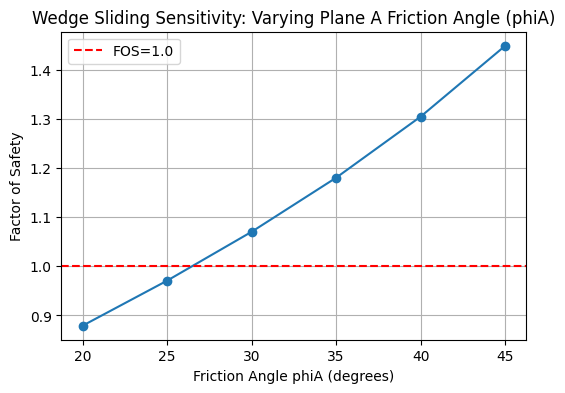

In [ ]:
# Part 3: Sensitivity Analysis Example
def sensitivity_wedge_sliding():
    friction_values = np.arange(20, 46, 5)
    fos_results = []

    # We'll keep other parameters fixed for demonstration
    for phiA_deg in friction_values:
        fos_val = wedge_sliding_fos(
            W=100.0,
            phiA_deg=phiA_deg,
            phiB_deg=30.0,    # fixed
            dipA_deg=40.0,    # fixed
            dipB_deg=35.0,    # fixed
            intersection_dip_deg=20.0,
            water_pressure_ratio=0.2
        )
        fos_results.append(fos_val)

    # Plotting
    plt.figure(figsize=(6,4))
    plt.plot(friction_values, fos_results, marker='o')
    plt.axhline(y=1.0, color='r', linestyle='--', label="FOS=1.0")
    plt.title("Wedge Sliding Sensitivity: Varying Plane A Friction Angle (phiA)")
    plt.xlabel("Friction Angle phiA (degrees)")
    plt.ylabel("Factor of Safety")
    plt.grid(True)
    plt.legend()
    plt.show()

# Execute the sensitivity analysis
sensitivity_wedge_sliding()


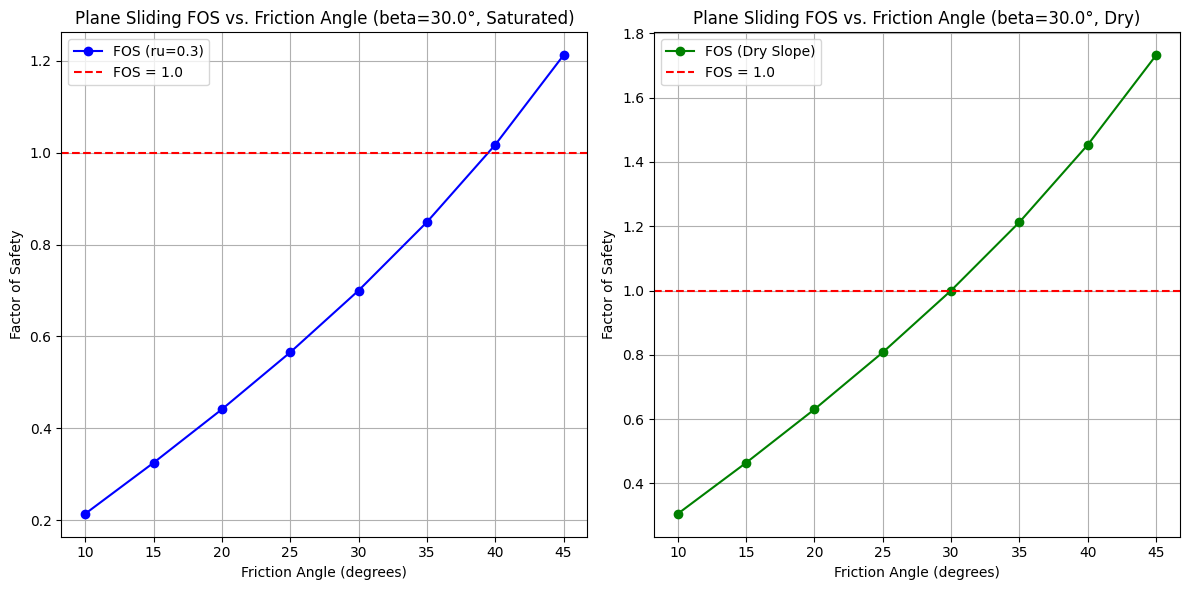

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plane_sliding_fos(phi_deg, beta_deg, ru):
    """
    Plane sliding factor of safety calculation based on slope angle,
    friction angle, and pore pressure ratio.

    Arguments:
        phi_deg: internal friction angle (degrees)
        beta_deg: slope angle (degrees)
        ru: pore pressure ratio (0 to 1)

    Returns:
        Factor of Safety (FOS)
    """
    phi = np.radians(phi_deg)
    beta = np.radians(beta_deg)

    # Assume unit weight of soil to be a certain value (e.g., 18 kN/m^3)
    gamma_soil = 18.0  # kN/m^3

    # Calculate effective weight
    effective_weight = gamma_soil * np.cos(beta) * (1 - ru)  # Adjust for pore pressure

    # Calculate FOS based on effective normal and shear resistance
    return np.tan(phi) / np.tan(beta) * (effective_weight / (gamma_soil * np.cos(beta)))

def plane_sliding_sensitivity(beta_deg, friction_angles, ru):  # Updated function signature
    """
    Returns a list of factor of safety values for an array of friction angles
    using the plane_sliding_fos function.
    """
    fos_list = []
    for phi_deg in friction_angles:
        fos_val = plane_sliding_fos(phi_deg, beta_deg, ru)  # Calling with phi_deg
        fos_list.append(fos_val)
    return fos_list

# Sensitivity Analysis Parameters
friction_angles_array = range(10, 46, 5)  # Friction angles from 10 to 45 in steps of 5
beta_demo = 30.0  # Fixed slope angle
pore_pressure_ratio_saturated = 0.3  # Example pore pressure ratio for the saturated slope
pore_pressure_ratio_dry = 0.0  # Completely dry slope

# Compute Factor of Safety values (using updated function call)
fos_vs_phi_saturated = plane_sliding_sensitivity(beta_demo, friction_angles_array, pore_pressure_ratio_saturated)
fos_vs_phi_dry = plane_sliding_sensitivity(beta_demo, friction_angles_array, pore_pressure_ratio_dry)

# Create two plots in one figure
plt.figure(figsize=(12, 6))

# Subplot for Saturated Slope (plotting against friction_angles_array)
plt.subplot(1, 2, 1)
plt.plot(list(friction_angles_array), fos_vs_phi_saturated, 'o-', color='blue', label=f"FOS (ru={pore_pressure_ratio_saturated})")
plt.axhline(y=1.0, color='r', linestyle='--', label="FOS = 1.0")
plt.xlabel("Friction Angle (degrees)")  # Updated x-axis label
plt.ylabel("Factor of Safety")
plt.title(f"Plane Sliding FOS vs. Friction Angle (beta={beta_demo}°, Saturated)")  # Updated title
plt.grid(True)
plt.legend()

# Subplot for Dry Slope (plotting against friction_angles_array)
plt.subplot(1, 2, 2)
plt.plot(list(friction_angles_array), fos_vs_phi_dry, 'o-', color='green', label="FOS (Dry Slope)")
plt.axhline(y=1.0, color='r', linestyle='--', label="FOS = 1.0")
plt.xlabel("Friction Angle (degrees)")  # Updated x-axis label
plt.ylabel("Factor of Safety")
plt.title(f"Plane Sliding FOS vs. Friction Angle (beta={beta_demo}°, Dry)")  # Updated title
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

This example shows two systems with identical parameters (friction and dip angles, and soil weight). The plot to the left represents the sytem in a saturated environment with pore water ration of 0.3. The plot to left represents a dry environment with zero pore water pressure ratio. The data shows that by applying a pore water pressure to the model, the FOS of the plane decreases due to the weight of the overlying soil and water parameters.

In part 1, the weight of the block modified to reflect a sandstone block with a weight 431.64 kN. The dip angle of the plane is 30 ° and friction angle is 36°. Additionally, the pore water pressure ration is 0.5, therefore, the resultant FOS of modeled plane results in an FOS of 0.629. This model is at risk of failure due to the FOS being less than 1. The second example in Part 1 shows an FOS of 1.032. The friction angle was increased to 50°. This increased friction angle value resulted in a stable or no risk model.

The example code in part 2 was modified to represent to separate dipping and friction angles to simulate a more realistic model. Also, the weight of the wedge as increased to 100 kN. These modified parameters result in an FOS 1.180 for the model. The original example yielded an FOS < 1 (0.867).

In the sensitivity analysis on part 3, two plots were generated. One model showed a saturated plane with a pore water pressure of 0.3, while the dry slope had no pore water pressure applied to it. The parameters were fixed for the models, dipping angle = 30°, and soil weight = 18 kN. The key takeaway from this section highlights how the pore water pressure can influence the plane stability due to the weight of water. In order for the saturated model to become stable, the friction angle must be > ~40°. On the other hand, the dry slope can remain stable with only 30° friction angle.


## Submission Instructions

1. Ensure each part of your notebook is clearly labeled:
   - Plane Sliding in Rock Mass (Part 1)
   - Spatial (Wedge) Sliding (Part 2)
   - Sensitivity Analysis (Part 3)
2. Provide inline comments or Markdown explanations referencing relevant figures (10.39–10.50) and any equations from the text.
3. Summarize your key findings at the end. Discuss where your simplified assumptions might differ from real field conditions (e.g., partial joint persistence, rock bridges, uneven water pressure).
4. Upload your completed notebook (including all code cells, Markdown documentation, and plots) to the designated course platform.

Remember, the code sketches here are only examples to get you started. You may refine, add more parameters, or introduce advanced geometry to match the complexity you feel is necessary for your analysis.

End of Assignment
